<a href="https://colab.research.google.com/github/prajwal145-tech/Chinook_Music/blob/main/Chinook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import sqlite3
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
conn = sqlite3.connect('/content/chinook.db')

def sq(query, con=conn):
    """Simple function to run SQL and get DataFrame back"""
    return pd.read_sql(query, con)

Finding the Best-Selling Products

In [7]:
top_products = sq('''
SELECT
    t.Name AS TrackName,
    ar.Name AS Artist,
    al.Title AS Album,
    g.Name AS Genre,
    SUM(il.Quantity) AS TotalSold,
    ROUND(SUM(il.UnitPrice * il.Quantity), 2) AS Revenue,
    ROUND(AVG(il.UnitPrice), 2) AS AvgPrice
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Album al ON t.AlbumId = al.AlbumId
JOIN Artist ar ON al.ArtistId = ar.ArtistId  -- need artist name
JOIN Genre g ON t.GenreId = g.GenreId        -- and genre
GROUP BY t.TrackId, t.Name, ar.Name, al.Title, g.Name
ORDER BY TotalSold DESC, Revenue DESC
LIMIT 15;
''')

print("Top 15 Best-Selling Tracks:")
display(top_products)

Top 15 Best-Selling Tracks:


,TrackName,Artist,Album,Genre,TotalSold,Revenue,AvgPrice
0,The Woman King,Battlestar Galactica,"Battlestar Galactica, Season 3",Science Fiction,2,3.98,1.99
1,The Fix,Heroes,"Heroes, Season 1",Drama,2,3.98,1.99
2,Walkabout,Lost,"Lost, Season 1",TV Shows,2,3.98,1.99
3,Hot Girl,The Office,"The Office, Season 1",TV Shows,2,3.98,1.99
4,Gay Witch Hunt,The Office,"The Office, Season 3",TV Shows,2,3.98,1.99
5,Phyllis's Wedding,The Office,"The Office, Season 3",Comedy,2,3.98,1.99
6,How to Stop an Exploding Man,Heroes,"Heroes, Season 1",Drama,2,3.98,1.99
7,Pilot,Aquaman,Aquaman,TV Shows,2,3.98,1.99
8,Balls to the Wall,Accept,Balls to the Wall,Rock,2,1.98,0.99
9,Inject The Venom,AC/DC,For Those About To Rock We Salute You,Rock,2,1.98,0.99


Sales by Country

In [8]:
revenue_by_region = sq('''
SELECT
    BillingCountry AS Country,
    COUNT(DISTINCT CustomerId) AS Customers,
    COUNT(*) AS Orders,
    ROUND(SUM(Total), 2) AS Revenue,
    ROUND(AVG(Total), 2) AS AvgOrder,
    ROUND(SUM(Total) / COUNT(DISTINCT CustomerId), 2) AS RevenuePerCustomer
FROM Invoice
GROUP BY BillingCountry
HAVING Revenue > 20  -- filter out tiny markets
ORDER BY Revenue DESC;
''')

print("Revenue by Country:")
display(revenue_by_region.head(10))

Revenue by Country:


,Country,Customers,Orders,Revenue,AvgOrder,RevenuePerCustomer
0,USA,13,91,523.06,5.75,40.24
1,Canada,8,56,303.96,5.43,38.00
2,France,5,35,195.10,5.57,39.02
3,Brazil,5,35,190.10,5.43,38.02
4,Germany,4,28,156.48,5.59,39.12
5,United Kingdom,3,21,112.86,5.37,37.62
6,Czech Republic,2,14,90.24,6.45,45.12
7,Portugal,2,14,77.24,5.52,38.62
8,India,2,13,75.26,5.79,37.63
9,Chile,1,7,46.62,6.66,46.62


Monthly Sales Trends

In [9]:
monthly_sales = sq('''
SELECT
    strftime('%Y-%m', InvoiceDate) AS Month,
    COUNT(*) AS Orders,
    ROUND(SUM(Total), 2) AS Revenue,
    ROUND(AVG(Total), 2) AS AvgOrder
FROM Invoice
GROUP BY Month
ORDER BY Month;
''')

print("Monthly Sales Performance:")
display(monthly_sales)

# Yearly view for cleaner trends
yearly_sales = sq('''
SELECT
    strftime('%Y', InvoiceDate) AS Year,
    COUNT(*) AS Orders,
    ROUND(SUM(Total), 2) AS Revenue,
    ROUND(AVG(Total), 2) AS AvgOrder
FROM Invoice
GROUP BY Year;
''')

print("\nYearly Summary:")
display(yearly_sales)

Monthly Sales Performance:


,Month,Orders,Revenue,AvgOrder
0,2009-01,6,35.64,5.94
1,2009-02,7,37.62,5.37
2,2009-03,7,37.62,5.37
3,2009-04,7,37.62,5.37
4,2009-05,7,37.62,5.37
5,2009-06,7,37.62,5.37
6,2009-07,7,37.62,5.37
7,2009-08,7,37.62,5.37
8,2009-09,7,37.62,5.37
9,2009-10,7,37.62,5.37



Yearly Summary:


,Year,Orders,Revenue,AvgOrder
0,2009,83,449.46,5.42
1,2010,83,481.45,5.80
2,2011,83,469.58,5.66
3,2012,83,477.53,5.75
4,2013,80,450.58,5.63


Genre Analysis

In [10]:
genre_analysis = sq('''
SELECT
    g.Name AS Genre,
    COUNT(DISTINCT t.TrackId) AS Tracks,
    SUM(il.Quantity) AS TotalSold,
    ROUND(SUM(il.UnitPrice * il.Quantity), 2) AS Revenue,
    -- market share calculation
    ROUND((SUM(il.Quantity) * 100.0 /
          (SELECT SUM(Quantity) FROM InvoiceLine)), 2) AS MarketShare
FROM Genre g
JOIN Track t ON g.GenreId = t.GenreId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY g.GenreId, g.Name
ORDER BY Revenue DESC;
''')

print("Genre Performance:")
display(genre_analysis.head(10))

Genre Performance:


,Genre,Tracks,TotalSold,Revenue,MarketShare
0,Rock,745,835,826.65,37.28
1,Latin,340,386,382.14,17.23
2,Metal,231,264,261.36,11.79
3,Alternative & Punk,203,244,241.56,10.89
4,TV Shows,43,47,93.53,2.10
5,Jazz,68,80,79.20,3.57
6,Blues,53,61,60.39,2.72
7,Drama,27,29,57.71,1.29
8,R&B/Soul,37,41,40.59,1.83
9,Classical,36,41,40.59,1.83



Customer Analysis with Rankings

In [11]:
customer_ranking = sq('''
SELECT
    c.FirstName || ' ' || c.LastName AS Name,
    c.Country,
    COUNT(i.InvoiceId) AS Orders,
    ROUND(SUM(i.Total), 2) AS TotalSpent,
    ROUND(AVG(i.Total), 2) AS AvgOrder,
    -- ROW_NUMBER gives unique ranks
    ROW_NUMBER() OVER (ORDER BY SUM(i.Total) DESC) AS SpendingRank,
    -- RANK allows ties
    RANK() OVER (ORDER BY SUM(i.Total) DESC) AS TiedRank,
    -- running total as we go down the list
    ROUND(SUM(SUM(i.Total)) OVER (
        ORDER BY SUM(i.Total) DESC
        ROWS UNBOUNDED PRECEDING
    ), 2) AS RunningTotal
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName, c.Country
ORDER BY TotalSpent DESC
LIMIT 20;
''')

print("Top 20 Customers:")
display(customer_ranking)

Top 20 Customers:


,Name,Country,Orders,TotalSpent,AvgOrder,SpendingRank,TiedRank,RunningTotal
0,Helena Holý,Czech Republic,7,49.62,7.09,1,1,49.62
1,Richard Cunningham,USA,7,47.62,6.80,2,2,97.24
2,Luis Rojas,Chile,7,46.62,6.66,3,3,143.86
3,Ladislav Kovács,Hungary,7,45.62,6.52,4,4,189.48
4,Hugh O'Reilly,Ireland,7,45.62,6.52,5,4,235.10
5,Julia Barnett,USA,7,43.62,6.23,6,6,278.72
6,Frank Ralston,USA,7,43.62,6.23,7,7,322.34
7,Fynn Zimmermann,Germany,7,43.62,6.23,8,7,365.96
8,Astrid Gruber,Austria,7,42.62,6.09,9,9,408.58
9,Victor Stevens,USA,7,42.62,6.09,10,9,451.20


Customer Churn Risk

In [12]:
# Churn analysis - who hasn't bought recently?
churn_analysis = sq('''
WITH customer_metrics AS (
    SELECT
        c.CustomerId,
        c.FirstName || ' ' || c.LastName AS Name,
        c.Country,
        COUNT(i.InvoiceId) AS Orders,
        ROUND(SUM(i.Total), 2) AS TotalSpent,
        MAX(i.InvoiceDate) AS LastPurchase,
        -- days since last purchase (using 2013-12-22 as "today")
        ROUND(JULIANDAY('2013-12-22') - JULIANDAY(MAX(i.InvoiceDate))) AS DaysSince
    FROM Customer c
    LEFT JOIN Invoice i ON c.CustomerId = i.CustomerId
    GROUP BY c.CustomerId
)
SELECT
    Name,
    Country,
    Orders,
    TotalSpent,
    LastPurchase,
    DaysSince,
    -- categorize risk levels
    CASE
        WHEN DaysSince > 365 THEN 'High Risk'
        WHEN DaysSince > 180 THEN 'Medium Risk'
        WHEN DaysSince > 90 THEN 'Low Risk'
        WHEN DaysSince IS NULL THEN 'Never Bought'
        ELSE 'Active'
    END AS ChurnRisk,
    -- value segments
    CASE
        WHEN TotalSpent > 40 THEN 'High Value'
        WHEN TotalSpent > 15 THEN 'Medium Value'
        WHEN TotalSpent > 0 THEN 'Low Value'
        ELSE 'No Value'
    END AS CustomerValue
FROM customer_metrics
ORDER BY TotalSpent DESC;
''')

print("Customer Churn Analysis:")
display(churn_analysis.head(25))

# Quick summary of churn risk
churn_summary = sq('''
WITH customer_risk AS (
    SELECT
        c.CustomerId,
        CASE
            WHEN JULIANDAY('2013-12-22') - JULIANDAY(MAX(i.InvoiceDate)) > 365 THEN 'High Risk'
            WHEN JULIANDAY('2013-12-22') - JULIANDAY(MAX(i.InvoiceDate)) > 180 THEN 'Medium Risk'
            WHEN JULIANDAY('2013-12-22') - JULIANDAY(MAX(i.InvoiceDate)) > 90 THEN 'Low Risk'
            WHEN MAX(i.InvoiceDate) IS NULL THEN 'Never Bought'
            ELSE 'Active'
        END AS Risk
    FROM Customer c
    LEFT JOIN Invoice i ON c.CustomerId = i.CustomerId
    GROUP BY c.CustomerId
)
SELECT
    cr.Risk,
    COUNT(c.CustomerId) AS Customers,
    ROUND(AVG(COALESCE(total_spent.spent, 0)), 2) AS AvgSpent
FROM Customer c
JOIN customer_risk cr ON c.CustomerId = cr.CustomerId
LEFT JOIN (
    SELECT CustomerId, SUM(Total) as spent
    FROM Invoice
    GROUP BY CustomerId
) total_spent ON c.CustomerId = total_spent.CustomerId
GROUP BY cr.Risk;
''')

print("\nChurn Risk Summary:")
display(churn_summary)

Customer Churn Analysis:


,Name,Country,Orders,TotalSpent,LastPurchase,DaysSince,ChurnRisk,CustomerValue
0,Helena Holý,Czech Republic,7,49.62,2013-11-13 00:00:00,39.0,Active,High Value
1,Richard Cunningham,USA,7,47.62,2013-04-05 00:00:00,261.0,Medium Risk,High Value
2,Luis Rojas,Chile,7,46.62,2012-10-14 00:00:00,434.0,High Risk,High Value
3,Ladislav Kovács,Hungary,7,45.62,2013-07-20 00:00:00,155.0,Low Risk,High Value
4,Hugh O'Reilly,Ireland,7,45.62,2013-11-04 00:00:00,48.0,Active,High Value
5,Frank Ralston,USA,7,43.62,2013-08-20 00:00:00,124.0,Low Risk,High Value
6,Julia Barnett,USA,7,43.62,2013-05-19 00:00:00,217.0,Medium Risk,High Value
7,Fynn Zimmermann,Germany,7,43.62,2013-06-03 00:00:00,202.0,Medium Risk,High Value
8,Astrid Gruber,Austria,7,42.62,2013-06-19 00:00:00,186.0,Medium Risk,High Value
9,Victor Stevens,USA,7,42.62,2013-12-05 00:00:00,17.0,Active,High Value



Churn Risk Summary:


,Risk,Customers,AvgSpent
0,Active,19,39.51
1,High Risk,13,38.85
2,Low Risk,12,39.62
3,Medium Risk,15,39.82


Pricing Strategy

In [13]:
price_analysis = sq('''
WITH track_sales AS (
    SELECT
        t.Name AS Track,
        ar.Name AS Artist,
        g.Name AS Genre,
        t.UnitPrice AS Price,
        SUM(il.Quantity) AS Sales,
        ROUND(SUM(il.UnitPrice * il.Quantity), 2) AS Revenue,
        -- price categories
        CASE
            WHEN t.UnitPrice >= 1.5 THEN 'Premium'
            WHEN t.UnitPrice >= 1.0 THEN 'Standard'
            ELSE 'Budget'
        END AS PriceTier
    FROM Track t
    JOIN Album al ON t.AlbumId = al.AlbumId
    JOIN Artist ar ON al.ArtistId = ar.ArtistId
    JOIN Genre g ON t.GenreId = g.GenreId
    JOIN InvoiceLine il ON t.TrackId = il.TrackId
    GROUP BY t.TrackId
    HAVING Sales >= 2  -- only tracks that actually sold
)
SELECT
    Track,
    Artist,
    Genre,
    Price,
    PriceTier,
    Sales,
    Revenue,
    ROUND(Revenue / Sales, 2) AS RevenuePerUnit,
    -- simple pricing assessment
    CASE
        WHEN Sales > 4 AND Price < 1.0 THEN 'Maybe Underpriced'
        WHEN Sales < 2 AND Price > 1.0 THEN 'Maybe Overpriced'
        ELSE 'Seems OK'
    END AS PriceAssessment
FROM track_sales
ORDER BY Revenue DESC
LIMIT 20;
''')

print("Price Analysis - Top Revenue Tracks:")
display(price_analysis)

# Summary by price tier
price_tiers = sq('''
SELECT
    CASE
        WHEN t.UnitPrice >= 1.5 THEN 'Premium'
        WHEN t.UnitPrice >= 1.0 THEN 'Standard'
        ELSE 'Budget'
    END AS Tier,
    COUNT(*) AS Sales,
    ROUND(AVG(t.UnitPrice), 2) AS AvgPrice,
    SUM(il.Quantity) AS TotalSold,
    ROUND(SUM(il.UnitPrice * il.Quantity), 2) AS Revenue
FROM Track t
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY Tier
ORDER BY Revenue DESC;
''')

print("\nPrice Tier Summary:")
display(price_tiers)

Price Analysis - Top Revenue Tracks:


,Track,Artist,Genre,Price,PriceTier,Sales,Revenue,RevenuePerUnit,PriceAssessment
0,The Woman King,Battlestar Galactica,Science Fiction,1.99,Premium,2,3.98,1.99,Seems OK
1,The Fix,Heroes,Drama,1.99,Premium,2,3.98,1.99,Seems OK
2,Walkabout,Lost,TV Shows,1.99,Premium,2,3.98,1.99,Seems OK
3,Hot Girl,The Office,TV Shows,1.99,Premium,2,3.98,1.99,Seems OK
4,Gay Witch Hunt,The Office,TV Shows,1.99,Premium,2,3.98,1.99,Seems OK
5,Phyllis's Wedding,The Office,Comedy,1.99,Premium,2,3.98,1.99,Seems OK
6,How to Stop an Exploding Man,Heroes,Drama,1.99,Premium,2,3.98,1.99,Seems OK
7,Pilot,Aquaman,TV Shows,1.99,Premium,2,3.98,1.99,Seems OK
8,Balls to the Wall,Accept,Rock,0.99,Budget,2,1.98,0.99,Seems OK
9,Inject The Venom,AC/DC,Rock,0.99,Budget,2,1.98,0.99,Seems OK



Price Tier Summary:


,Tier,Sales,AvgPrice,TotalSold,Revenue
0,Budget,2129,0.99,2129,2107.71
1,Premium,111,1.99,111,220.89


Visualizations

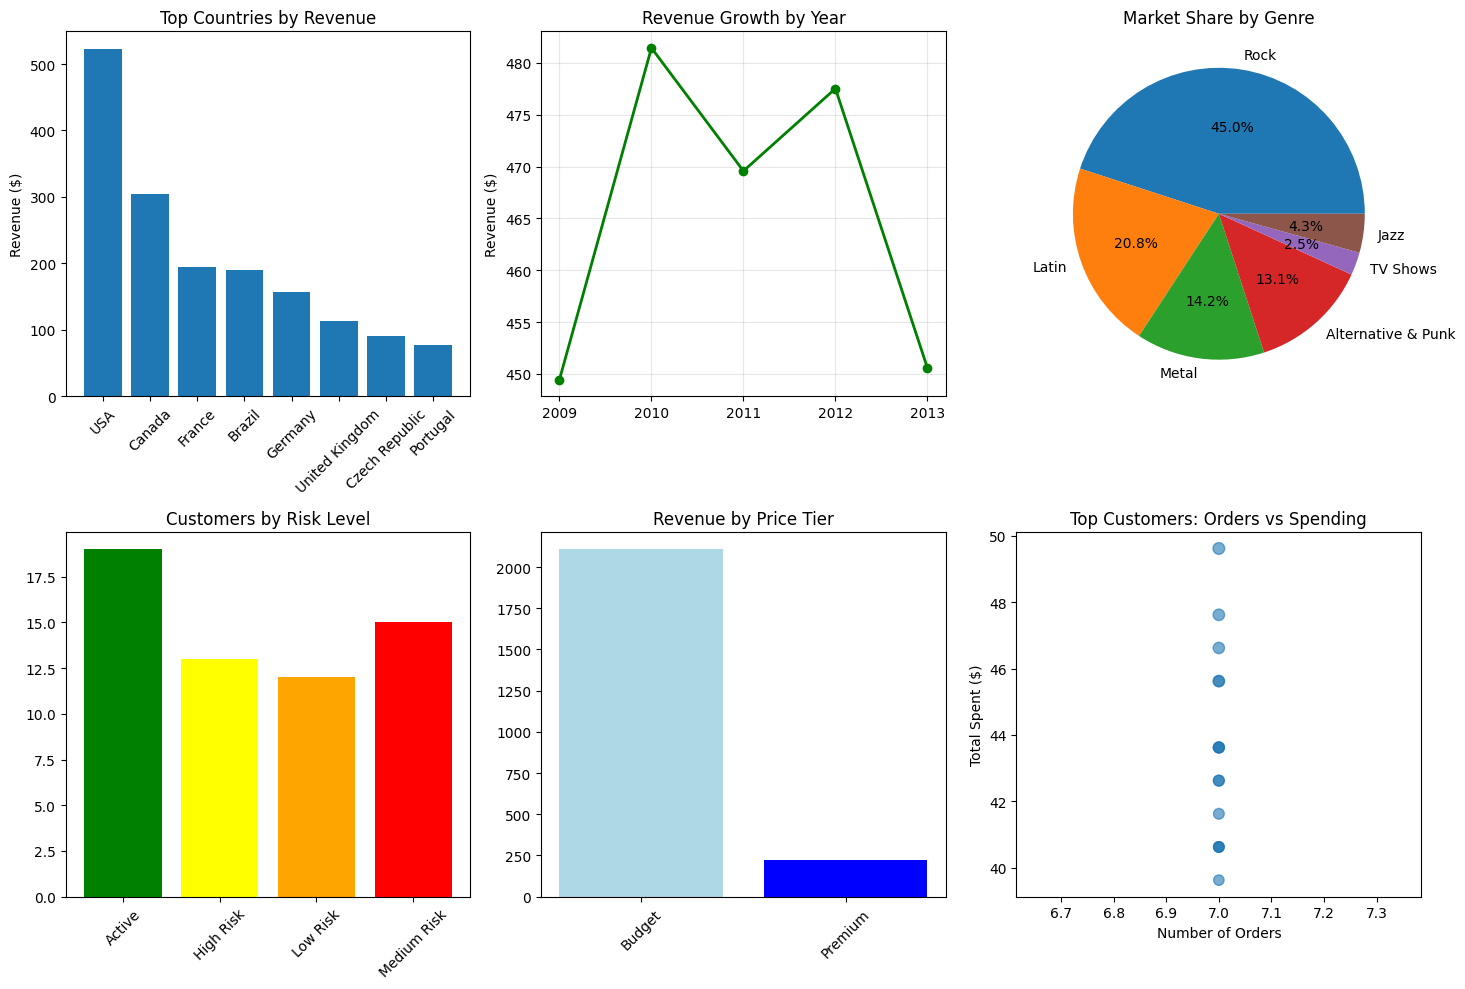

Dashboard complete


In [14]:
# Multi-panel dashboard
plt.figure(figsize=(15, 10))

# Top countries
plt.subplot(2, 3, 1)
top_countries = revenue_by_region.head(8)
plt.bar(range(len(top_countries)), top_countries['Revenue'])
plt.xticks(range(len(top_countries)), top_countries['Country'], rotation=45)
plt.title('Top Countries by Revenue')
plt.ylabel('Revenue ($)')

# Yearly trend
plt.subplot(2, 3, 2)
plt.plot(yearly_sales['Year'], yearly_sales['Revenue'], 'go-', linewidth=2)
plt.title('Revenue Growth by Year')
plt.ylabel('Revenue ($)')
plt.grid(True, alpha=0.3)

# Genre market share
plt.subplot(2, 3, 3)
top_6_genres = genre_analysis.head(6)
plt.pie(top_6_genres['MarketShare'], labels=top_6_genres['Genre'],
        autopct='%1.1f%%')
plt.title('Market Share by Genre')

# Churn risk
plt.subplot(2, 3, 4)
plt.bar(churn_summary['Risk'], churn_summary['Customers'],
        color=['green', 'yellow', 'orange', 'red'])
plt.title('Customers by Risk Level')
plt.xticks(rotation=45)

# Price tiers
plt.subplot(2, 3, 5)
plt.bar(price_tiers['Tier'], price_tiers['Revenue'],
        color=['lightblue', 'blue', 'darkblue'])
plt.title('Revenue by Price Tier')
plt.xticks(rotation=45)

# Customer spending pattern
plt.subplot(2, 3, 6)
top_customers = customer_ranking.head(15)
plt.scatter(top_customers['Orders'], top_customers['TotalSpent'],
           s=top_customers['AvgOrder']*10, alpha=0.6)
plt.xlabel('Number of Orders')
plt.ylabel('Total Spent ($)')
plt.title('Top Customers: Orders vs Spending')

plt.tight_layout()
plt.show()

print("Dashboard complete")

Key Performance Indicators

In [15]:
# Extract and display key business metrics
print("KEY PERFORMANCE INDICATORS")
print("=" * 50)

# Sales performance metrics
best_track = top_products.iloc[0]
top_country = revenue_by_region.iloc[0]
leading_genre = genre_analysis.iloc[0]
top_customer = customer_ranking.iloc[0]

print("SALES PERFORMANCE METRICS:")
print(f"• Best-selling track: {best_track['TrackName']} by {best_track['Artist']}")
print(f"  - Units sold: {best_track['TotalSold']}")
print(f"  - Revenue generated: ${best_track['Revenue']:,.2f}")
print()
print(f"• Top revenue market: {top_country['Country']}")
print(f"  - Total revenue: ${top_country['Revenue']:,.2f}")
print(f"  - Unique customers: {top_country['Customers']}")
print(f"  - Average order value: ${top_country['AvgOrder']:.2f}")
print()
print(f"• Leading genre: {leading_genre['Genre']}")
print(f"  - Market share: {leading_genre['MarketShare']}%")
print(f"  - Total revenue: ${leading_genre['Revenue']:,.2f}")

KEY PERFORMANCE INDICATORS
SALES PERFORMANCE METRICS:
• Best-selling track: The Woman King by Battlestar Galactica
  - Units sold: 2
  - Revenue generated: $3.98

• Top revenue market: USA
  - Total revenue: $523.06
  - Unique customers: 13
  - Average order value: $5.75

• Leading genre: Rock
  - Market share: 37.28%
  - Total revenue: $826.65
